# Predicting volume (total_bet_euro) for 2018 Q1

In [105]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [6]:
conn = sqlite3.connect('casino.db')

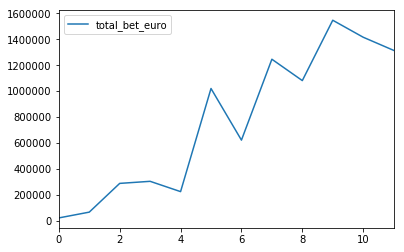

In [14]:
q = """
select 
    case 
        when cast(strftime('%m', date) as integer) between 1 and 3 then strftime('%Y', date) || ' Q1'
        when cast(strftime('%m', date) as integer) between 4 and 6 then strftime('%Y', date) || ' Q2'
        when cast(strftime('%m', date) as integer) between 7 and 9 then strftime('%Y', date) || ' Q3'
        else strftime('%Y', date) || ' Q4' end as YQ
    , sum(bet_euro) as total_bet_euro
from FACT_BETS
group by YQ
order by date(date);
"""
df = pd.read_sql(q, conn)
df.plot()

In [104]:
df

,YQ,total_bet_euro
0,2015 Q1,2.143267e+04
1,2015 Q2,6.609634e+04
2,2015 Q3,2.879407e+05
3,2015 Q4,3.039547e+05
4,2016 Q1,2.243895e+05
5,2016 Q2,1.020508e+06
6,2016 Q3,6.220043e+05
7,2016 Q4,1.246428e+06
8,2017 Q1,1.081551e+06
9,2017 Q2,1.547411e+06


To predict: 12 | 2018 Q1

12 time interval represents 2018 Q1

In [117]:
x_axis_for_result_plot = np.append(df['YQ'].values, ['2018 Q1'])

In [30]:
Y_train = df.values[:,1].reshape(-1, 1)

In [34]:
X_train = np.arange(len(Y_train)).reshape(-1, 1)

## Linear regression

In [114]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(X_train, Y_train)

X_pred = np.append(X_train, [[12]], axis=0)

In [84]:
print("Predicted value for 2018 Q1 (12th interval) - linear regression: {:.2f} EUR".format(regr.predict(X_pred)[-1][0]))

Predicted value for 2018 Q1 (12th interval) - linear regression: 1711684.37 EUR


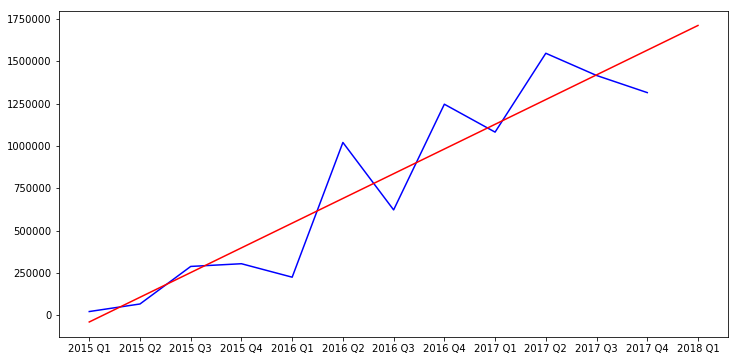

In [149]:
plt.figure(figsize=(12,6))
plt.xticks(X_pred, x_axis_for_result_plot)

plt.plot(X_train, Y_train,color='b')
plt.plot(X_pred, regr.predict(X_pred), color='r')
plt.show()

## 2nd degree polynomial interpolation

In [109]:
poly = PolynomialFeatures(degree=2)
X_train_ = poly.fit_transform(X_train)
X_pred_ = poly.fit_transform(X_pred)

regr_polinomial = linear_model.LinearRegression()
regr_polinomial.fit(X_train_, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
print("Predicted value for 2018 Q1 (12th interval) - 2nd degree polinomial: {:.2f} EUR".format(regr_polinomial.predict(X_pred_)[-1][0]))

Predicted value for 2018 Q1 (12th interval) - 2nd degree polinomial: 1626108.34 EUR


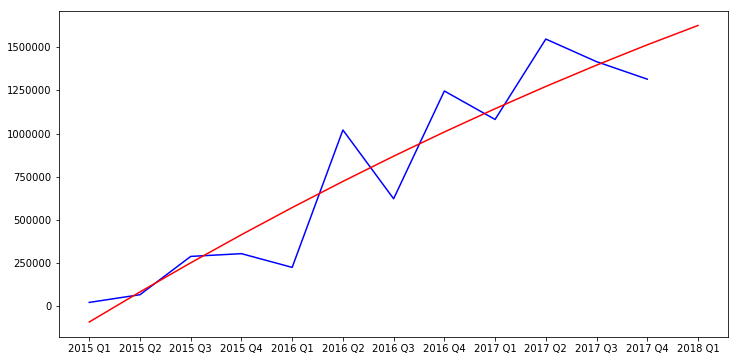

In [148]:
plt.figure(figsize=(12,6))
plt.xticks(X_pred, x_axis_for_result_plot)

plt.plot(X_train, Y_train,color='b')
plt.plot(X_pred, regr_polinomial.predict(X_pred_), color='r')
plt.show()